In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import edhec_risk_kit as erk
import yfinance as yf
import seaborn as sns
from datetime import date
from pandas_datareader import data
import work as work
import investpy

import plotly.express as px
import plotly.graph_objects as go
import plotly

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core.display import display, HTML


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#data = work.updated_world_indices(category = 'All', timeframe='Weekly')
#hmap = data[0]
#rawdata = data[1]
#rawdata.to_excel('rawdata.xlsx', sheet_name='Equities')

# Weekly Global Market Report


<div style="font-size: 15px">
<br>
    <b> Date: </b>  19<sup>th</sup> December, 2020
</div>

<a id ="content"></a>
## Contents:

1. [World Equities](#eq)
2. [Fixed Income](#fi)
3. [Currencies (FX)](#cur)
4. [Commodities](#comd)
5. [Charts of the Week](#charts)
6. [Key Economic Events - Next Week](#eco)

# World Equity Markets Heatmap

In [3]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def world_map(timeperiod):
    """
    """
    iso = pd.read_excel('World_Indices_List.xlsx', sheet_name='iso')
    iso.set_index('Country', inplace=True)
    rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
    rawdata = rawdata.drop(['China A50', 'SmallCap 2000', 'BSE Sensex', 'Euro Stoxx 50', 'Nasdaq 100', 'KOSDAQ', 'RTSI', 'DJ Shanghai', 'SZSE Component'], axis=0)
    data2 = rawdata.merge(iso['iso_alpha'], on='Country')
    data2[['Chg (%)', 'Chg YTD (%)', '$ Chg (%)','$ Chg YTD (%)']] = data2[['Chg (%)', 'Chg YTD (%)', '$ Chg (%)','$ Chg YTD (%)']].round(4)*100

    df = data2
    for col in df.columns:
        df[col] = df[col].astype(str)

    df['text'] = 'Return: '+df[timeperiod]+'%' + '<br>' \
                  'Country: '+ df['Country'] + '<br>' \

    fig1 = go.Figure(data=go.Choropleth(locations=df['iso_alpha'], z=df[timeperiod].astype(float).round(2), colorscale='RdYlGn', autocolorscale=False,
        text=df['text'], colorbar_ticksuffix = '%', colorbar_title = "Return", zmax=3, zmin=-1))



    return fig1.update_layout(width=950, height=500, margin=dict(l=0,r=0,b=0,t=0,pad=1),
                        xaxis=dict(scaleanchor='x', constrain='domain'), coloraxis_colorbar_x=1)

style = {'description_width': 'initial'}
interact(world_map,
             timeperiod = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Return Category: '));

interactive(children=(Dropdown(description='Return Category: ', index=2, options=(('Weekly LCL Returns', 'Chg …

<a id ="eq"></a>
## World Equities

### Local Currency & USD Performance (Weekly & YTD)
*Data is sorted by Weekly USD Performance (%)

In [4]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def hmap(sortby):
    hmap = rawdata.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}",'Chg': "{:.2f}", 'Chg (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}", '$ Chg (%)': "{:.2%}", '$ Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)', 'Chg', 'Country'], axis=1).columns))
    return hmap
    
style = {'description_width': 'initial'}
interact(hmap,
             sortby = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', index=2, options=(('Weekly LCL Returns', 'Chg (%)'), (…

**HIGHLIGHTS**:

- **Wall Street** Wall Street closed in the red on Friday in a volatile trading session, as policymakers rushed to bridge differences on additional stimulus measures. Party leaders said on Friday they are close to an agreement that would provide USD 900 billion in aid, with Senate Majority Leader Mitch McConnell saying that talks “remain productive”. On the corporate side, electric carmaker Tesla stock traded higher ahead of its listing in the S&P 500. With a market capitalization of more than USD 600 billion after a 700% rally this year, Tesla will trade as the seventh-largest company in the index. The Dow Jones declined 124 points or 0.4% to 30,179. The S&P 500 shed 13 points or 0.3% to 3710. The Nasdaq lost 9 points or 0.1% to 12,756. During the week, the Dow Jones gained 0.4%, the S&P added 1.3%, and the Nasdaq jumped 3.1%.


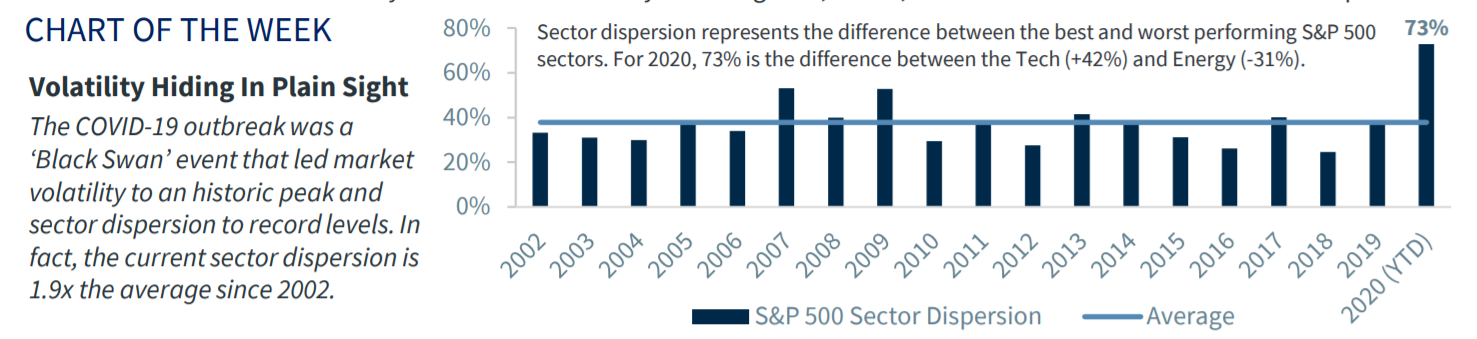


- **US COVID Update***: The US began this week a vaccination campaign and the first 49,567 doses of the Pfizer/BioNTech Covid-19 vaccine were already administered. Healthcare workers and elderly residents of long-term care homes were first in line to receive the vaccine. Colorado (8,217 doses), New York (7,600 doses), Texas (4,187 doses) and Nebraska (4,069) are the states with more shots administered and those numbers are expected to surge in the coming days. Among the total 5.9 million doses of the Pfizer/BioNTech vaccine, 327,600 were allotted to California, 224,250 to Texas, 179,400 to Florida, and 169,650 to New York. The United States is the world's hardest-hit country by the coronavirus pandemic, with more than 17 million cases and over 310,000 deaths.


- Equities in **EUROPE** traded cautiously on Friday with Frankfurt's DAX 30 edging 0.3% lower, but ended up 4.95% on the week (best performer in DMs). On Thursday, European Commission President Ursula von der Leyen said that ["big differences remain"](https://www.irishtimes.com/news/world/europe/von-der-leyen-says-big-differences-remain-between-eu-and-uk-after-call-with-johnson-1.4439568), in particular on fisheries, and "bridging them will be very challenging" and on Friday, European Union Brexit negotiator Michel Barnier said that there was a chance of getting an agreement but the path to such an agreement was very narrow. On the macro front, The [Ifo Business Climate indicator for Germany went up to 92.1 in December](https://www.ifo.de/en/survey/ifo-business-climate-index) of 2020 from an upwardly revised 90.9 in the previous month, beating market forecasts of 90. Earlier in the week, we also saw [strong PMI numbers out of Germany](https://in.reuters.com/article/us-germany-economy-pmi/germanys-private-sector-shows-resilience-before-stricter-lockdown-pmi-idINKBN28Q0Z6) with strength in manufacturing (58.6 vs 57.8, 34-month high) continuing to offset service sector weakness (47.7 vs 46). Consumer prices fell 0.3% YoY in November, the most since January of 2015. 


- The CAC 40 (**FRANCE**) rose 0.3% (1.3% USD) on the week. CAC Technology index outperformed by surging 4.3% and CAC Oil & Gas index underperformed (-1.6%). On the economic data, recent figures showed [manufacturing PMI rose to a four-month high of 49.6](https://in.reuters.com/article/us-france-economy-pmi/french-business-slump-eased-in-december-as-restrictions-loosened-pmi-idINKBN28Q0X6) from 40.6 in November, beating by a wide margin the 42.9 expected by economists in a Reuters poll, while [service PMI surged to 49.2 in December from 38.8](https://www.forexlive.com/news/!/france-december-flash-services-pmi-vs-400-expected-20201216) in the previous month (vs 40 consensus). Also, firms were optimistic towards the 12- month business outlook with confidence reaching the highest level for almost a year. Meantime, French President [Emmanuel Macron tested positive for Covid-19](https://www.hindustantimes.com/world-news/french-president-emmanuel-macron-has-tested-positive-for-covid-19/story-8XKqMwQwauE1tbD9DzNvCM.html) and will self-isolate for seven days.



- The FTSE MIB (**ITALY**) rose 2.25% (USD), with FTSE IT Technology outperforming with a gain of 4.3% and FTSE Oil&Gas underperforming (-0.43%). On the macro front, Italy’s current account surplus shrank to EUR 8.17 billion in October of 2020 from EUR 9.63 in the same month of the previous year. [Producer prices decreased by 2.3% YoY in November](https://markets.businessinsider.com/news/interestrates/italy-producer-prices-fall-further-1029905846) (-0.2% MoM), following a downwardly revised 2.4% fall in the previous month. On the inflation front, [consumer prices decreased 0.2% YoY in November](https://in.reuters.com/article/eurozone-economy-inflation/euro-zone-inflation-confirmed-as-negative-in-nov-for-fourth-month-idINKBN28R16C?il=0), following a 0.3% fall in the previous month and in line with preliminary estimates. 



- The IBEX 35 (**SPAIN**) declined 0.32% for the week, with the IBEX 35 Banks index outperforming with a gain of 1%. The IBEX 35 fell 1.4% to close at 8,037 on Friday, its lowest level since November 23rd, underperforming its European peers. Spain will now [allow regions to tighten anti-coronavirus measures as part of its Christmas plan](https://in.reuters.com/article/us-health-coronavirus-spain/spain-worries-about-christmas-as-cases-rise-again-idINKBN28Q2SN), meaning gatherings could be limited to six people, curfews could be lengthened, and travel between regions banned. Meantime, [Spanish Prime Minister Pedro Sanchez tested negative for COVID-19 but will quarantine until December 24](https://in.reuters.com/article/health-coronavirus-macron-sanchez/spains-sanchez-tests-negative-for-covid-19-to-quarantine-after-meeting-frances-macron-idINKBN28R204) after being in contact with French President Emmanuel Macron, who has tested positive for coronavirus. The country is now expected to [begin vaccinating its population on December 27th](https://www.aninews.in/news/world/europe/spain-to-start-vaccinations-against-covid-19-on-dec-27-health-minister20201219081920/), along with the rest of Europe.



- The Shanghai Composite (**CHINA**) fell 0.29% on Friday, snapping 2 sessions of gains while closing 1.81% higher for the week as risk sentiment was hit after the [US energy secretary signed an order prohibiting electric utilities that supply critical defense facilities from importing certain power system items from China](https://www.reuters.com/article/usa-electricity-china/us-bans-utilities-supplying-defense-facilities-from-buying-power-grid-items-from-china-idUSL1N2IX2A6). The news follows reports that President Donald Trump is set to add around [80 more Chinese companies and their affiliates to the Commerce Department’s Entity List](https://in.reuters.com/article/us-usa-china-sanctions-exclusive/exclusive-u-s-to-blacklist-dozens-of-chinese-firms-including-smic-sources-say-idUSKBN28S0HL). [Foreign direct investment into China increased 6.3% YoY to USD 137.20 billion](https://www.scmp.com/economy/china-economy/article/3114012/china-fdi-63-cent-2020-november-55-cent) in the January-November 2020 period.  In November, the [industrial output rose by 7% YoY](https://www.scmp.com/economy/china-economy/article/3113949/chinas-economic-recovery-broadened-november-retail-sales), the most since March 2019; while [retail sales growth accelerated to 5% YoY](https://www.scmp.com/economy/china-economy/article/3113949/chinas-economic-recovery-broadened-november-retail-sales) from 4.3% in October. Meantime, the jobless rate was recorded at 5.2% in November, the least in eleven months. [Average new home prices in China's 70 major cities increased by 4% YoY in November](https://www.scmp.com/business/banking-finance/article/3113913/chinas-november-average-home-price-rises-33rd-month) 2020, after a 4.3% rise in the previous month, slowest since February 2016. In Hong Kong, the Hang Seng Index fell 0.93% Friday while falling 0.39% for the week as Hong Kong reported 96 cases on Thursday with [transmission risks remaining high](https://www.scmp.com/news/hong-kong/health-environment/article/3114474/hong-kong-fourth-wave-quarantine-backlog-fears).



- The Nikkei 225 (**JAPAN**) fell 0.16% on Friday, snapping 2 sessions of gain, ending the week up a modest 0.25%, as investors react to BoJ's monetary policy decision and follow accelerating domestic coronavirus infection rates. The [Bank of Japan announced a six-month extension of its corporate bond-buying program](https://www.japantimes.co.jp/news/2020/12/18/business/bank-of-japan-probe-price-goal-approach/) and added they will begin looking into better ways to achieve its inflation target of 2% and release its finding in March. Meanwhile, Tokyo raised its [COVID-19 alert level to the highest of four stages](https://www.channelnewsasia.com/news/asia/covid-19-tokyo-alert-highest-level-medical-crunch-13792874) on Thursday as the number of new cases surged to a record daily high of 822. In local news, Japan has put together a [record budget for next fiscal year (USD 1.02 trillion)](https://in.reuters.com/article/japan-economy-budget-idINL1N2IW3CV) as Prime Minister Yoshihide Suga’s government looks to shore up the economy and allocate spending to contain infection rates. On the data front, [consumer prices went down 0.9% YoY in November](https://www.axios.com/bank-japan-inflation-low-0c7bbb2e-0a1c-4465-bda3-8bf14880831d.html), the biggest fall since August of 2020.



- The KOSPI (**SOUTH KOREA**) added 0.11% on Friday, closing at record highs, gaining 0.1% for the week. The Korea Disease Control and Prevention Agency reported 1,014 COVID-19 cases Thursday, nearing record highs and [prompting authorities to consider adopting the highest level of social distancing measures](https://in.reuters.com/article/us-health-coronavirus-southkorea/south-korea-reports-1053-new-coronavirus-cases-kdca-idINKBN28T00Z), limiting gatherings to 10 people and require companies to have nonessential employees work from home.  In local data, the unemployment rate edged down to 4.1% in November from 4.2% in the previous month, while import and export prices fell for the fifth and fourth consecutive month respectively. [South Korea’s economy is expected to expand 3.2% after contracting 1.1% this year](https://borneobulletin.com.bn/2020/12/s-korea-expects-gdp-to-grow-3-2pc-in-2021/), according to the finance ministry’s 2021 policy outlook.



- The S&P/ASX 200 (**AUSTRALIA**) Index dropped 1.2% on Friday, snapping 2 sessions of consecutive gain despite touching fresh 10-month highs in intraday trade, while closing 0.66% higher for the week. Sentiment soured as New South Wales [Premier Gladys Berejiklian warned that Sydney should prepare for more infections](https://www.theguardian.com/australia-news/2020/dec/19/greater-sydney-lockdown-fears-as-gladys-berejiklian-warns-coronavirus-cases-to-worsen) after 17 new cases were reported in the city’s northern coastal suburbs, prompting authorities to ask residents to stay at home for three days. The possibility of further restrictions ahead of Christmas season dragged shares of airlines lower, with Qantas and smaller rival Regional Express Holdings sliding as much as 3.53% and 5.39% respectively. Meantime, strong local data boosted the Aussie as the seasonally adjusted [unemployment rate was 6.8% in November](https://in.reuters.com/article/australia-economy-employment/update-2-australia-nov-jobs-soar-again-in-boost-to-economic-recovery-idUSL1N2IX01B), the lowest jobless rate since August, while new [home sales jumped 15.2% over the same period](https://www.abc.net.au/news/2020-12-18/regional-real-estate-sales-booming-in-south-australia/12995048), setting a new decade high and after a 1.3% fall a month earlier.

**EMERGING MARKETS**

- **MEXICO’s IPC** declined 1% on Friday, while gaining 0.6% during the week. The Ministry of Finance [improved its 2021 debt-to-GDP forecasts to 52.6% from 53.7%](https://in.reuters.com/article/mexico-economy-debt/update-1-mexico-forecasts-fall-in-public-sector-debt-to-52-6-of-gdp-next-year-idUSL1N2IY023), as the economy and receipts continue to recover. Meanwhile, the latest central bank survey showed analysts improved their 2021 GDP growth expectations to 3.44% from 3.34%. Mexican lawmakers have postponed until February debate over a [controversial bill](https://www.bloomberg.com/news/articles/2020-12-15/mexico-postpones-contentious-banxico-dollar-bill-until-february) that would have forced the central bank to buy possibly-illicit dollars, providing some respite in a debate that triggered fierce opposition from Banxico, private banks and the country’s most powerful business lobby. The [bill](https://www.bloomberg.com/news/articles/2020-12-16/mexico-s-controversial-central-bank-bill-was-delayed-here-s-why) would require Banxico to act as the buyer of last resort for local banks that are having trouble selling their dollars back to the U.S. due to money laundering controls. [Mexico City will shut down](https://www.bloomberg.com/news/articles/2020-12-18/mexico-city-to-shut-down-non-essential-activity-on-covid-spike) all nonessential activity starting on Saturday through Jan. 10 as Covid-19 cases soar in the nation’s capital.


- **BRAZIL**’s Ibovespa closed in the red for the first session in five and retreated from a high since January 24th in a volatile session, as fiscal uncertainty extended. The index surged 3% during the week. Economy Minister Paulo Guedes said that Brazil's government may consider new economic measures if needed, although he considers mass vaccination a cheaper option. On the data front, [Brazil’s current account balance shifted to a mild surplus in November of 2020](https://tradingeconomics.com/brazil/current-account) compared to a deficit a year ago, although below market estimates. On the pandemic side, over 1000 daily COVID-19 deaths were recorded for the first time in over three months. All Brazilians are [required to be vaccinated](https://www.bloomberg.com/news/articles/2020-12-17/brazil-s-supreme-court-rules-against-covid-anti-vaxxers) against Covid-19 under the penalty of being banned from certain public activities and spaces, the country’s top court has decided. The country’s coronavirus [immunization plan](https://www.bloomberg.com/news/articles/2020-12-14/brazil-s-vaccination-plan-elicits-more-questions-than-answers) did little to assuage concerns that the government is stumbling in its efforts to inoculate 212 million people, with no timeline and vague supply agreements. The federal government is said to have decided to buy the Coronavac vaccine, developed by China’s Sinovac and produced by Butantan Institute in Sao Paulo.


- The **SOUTH AFRICA** FTSE/JSE All Share Index fell 1.3% on Friday, its biggest daily decline since November 30th, taking the week's gain to a meagre 0.43%. The South African economy’s ability to recover from its longest downward cycle since 1945 has been dealt a blow by [new restrictions](https://www.bloomberg.com/news/articles/2020-12-15/south-africa-s-85-month-downward-cycle-may-linger-with-new-rules) to curb surging coronavirus infections. The economy entered the 85th month of a weakening cycle in December, according to the Reserve Bank’s Quarterly Bulletin. A continent-wide free-trade pact could help to realize more than [USD 84 billion in untapped intra-African exports](https://www.bloomberg.com/news/articles/2020-12-15/africa-trade-deal-could-tap-84-billion-in-export-opportunities), according to a new report by the African Export-Import Bank. Meanwhile, Johnson & Johnson became the [first company to apply for registration of a Covid-19 vaccine in South Africa](https://www.reuters.com/article/health-coronavirus-safrica-vaccine-idUSKBN28O1EK), the head of the country’s health products regulator said. In South Africa, Covid-19 continues to spread rapidly, as the country recorded on Thursday another 9,131 confirmed cases, after topping the 10,000 mark on Wednesday for the first time since August. 


In other EM developments,


- **Chile**’s government took a step to taming currency volatility with a bill that aims to reduce market swings triggered by changes in local pension-fund research companies’ reports. The government won’t be able to reach a goal of vaccinating 80% of the population before June 30 due to logistical issues, said Health Minister Enrique Paris. Fitch Ratings cut its outlook on **Peru**’s foreign debt for the first time in almost two decades as “populist” congressional spending measures undermine public finances battered by the pandemic. Peru’s [economic activity fell 3.8%](https://www.bloomberg.com/news/articles/2020-12-15/peru-s-economy-posts-smaller-than-expected-drop-in-october) in October from a year earlier, less than the expected 5% drop.


- Morgan Stanley and Nomura Holdings Inc. say it’s time to bet on a rebound in [**Dubai**’s tourism industry](https://www.bloomberg.com/news/articles/2020-12-17/scarred-dubai-may-be-a-can-t-miss-vaccine-play-as-travel-revives) as 200,000 travelers fly in to the desert city for the Christmas and New Year holidays. Abu Dhabi is [planning to re-open](https://www.bloomberg.com/news/articles/2020-12-13/abu-dhabi-to-re-open-to-foreign-tourists-amid-vaccine-optimism) for international tourists by early January as it eases restrictive measures. [Business activity](https://www.bloomberg.com/news/articles/2020-12-14/dubai-business-conditions-worsen-as-pandemic-weigh-on-demand) in Dubai dropped for a second month in November (49 PMI vs 49.9 in Oct). **Saudi Arabia** has [stopped disclosing](https://www.bloomberg.com/news/articles/2020-12-15/saudis-won-t-disclose-oil-revenue-projections-now-aramco-listed) projected revenue from oil following the listing of Aramco, as doing so could give clues about the state energy giant’s dividend plans. The kingdom’s [oil economy contracted 8.2%](https://www.bloomberg.com/news/articles/2020-12-17/saudi-non-oil-economy-contracts-at-slower-rate-in-third-quarter) in the third quarter compared with a year ago, the most since the current readings began a decade ago


- **Poland** will close hotels, ski-slopes and shopping malls under the planned quarantine at the turn of the year as it braces for “tough days and weeks” before the vaccine is rolled out, Health Minister Adam Niedzielskis said. **Thailand** suspended its [domestic travel subsidy program](https://www.bloomberg.com/news/articles/2020-12-16/thailand-halts-domestic-travel-subsidy-program-before-holidays) ahead of the peak holiday season to investigate allegations of irregularities in the government-funded program meant to help the pandemic-hit tourism industry. **Indonesia** will offer [free Covid-19 vaccines](https://www.bloomberg.com/news/articles/2020-12-16/indonesia-to-offer-free-vaccines-with-jokowi-to-get-first-shot) to people after considering the state budget, said President Joko Widodo. Indonesia plans to vaccinate its young working-age population against the coronavirus before the elderly, in contrast to much of the world that’s planning on putting its vulnerable older people first in line.


**ECONOMIC DATA WATCH**


- Flash PMI readings showed that growth remained uneven across manufacturing and services sectors in the US, Eurozone, UK and Japan as the pandemic is still raging and new restrictions that could stifle growth are put in place. In the US, [initial jobless claims rose](https://apnews.com/article/technology-jobless-claims-unemployment-coronavirus-pandemic-economy-3dfd19dfdf6a9e940b492e23b4d87403) for the second week to 885k. [Retail sales fell more than expected by 1.1% MoM](https://www.nytimes.com/2020/12/16/business/us-retail-sales-november.html) even in a Black Friday sales month. [Industrial production](https://www.news18.com/news/business/us-industrial-production-up-0-4-in-november-with-auto-boost-3180701.html) meanwhile was boosted by vehicles production.


- [Eurozone industrial production growth accelerated] (2.1% MoM)(https://think.ing.com/snaps/eurozone-strong-growth-for-industrial-production-as-second-corona-wave-hit/) in October prior to lockdowns; [trade surplus widened](https://in.reuters.com/article/eurozone-economy-trade/euro-zone-trade-surplus-swells-as-exports-recover-more-than-imports-idUSL8N2IW2C4) as exports improved although international trade still yet to catch up to pre-crises level. UK data were particularly poor as the economy [continued to shed jobs](https://www.ft.com/content/5bf2aaf5-c3ad-4a9a-9083-feccd8becac6) but a [consumer sentiment gauge improved](https://www.marketwatch.com/story/uk-consumer-confidence-rises-in-december-2020-12-18) after the end of recent lockdown. Other than that, [inflation generally retreated](https://economictimes.indiatimes.com/news/international/business/uk-inflation-slides-on-virus-restrictions-data/articleshow/79755722.cms) in the UK, Eurozone as well as Japan. China’s industrial production, retail sales and fixed investment met expectations; the positive readings reaffirmed the country’s solid path towards recovery. [Singapore NODX (Non-Oil Domestic Exports) also disappointed](https://www.channelnewsasia.com/news/business/singapore-nodx-falls-4-9-in-november-non-electronics-13789058) as shipments to China declined.



- Data downunder were upbeat as widely expected given successful containment of the virus. [Australia added more jobs](https://in.reuters.com/article/australia-economy-employment/update-2-australia-nov-jobs-soar-again-in-boost-to-economic-recovery-idUSL1N2IX01B) than expected and unemployment rate fell. Westpac leading index registered the largest gain on record. [New Zealand saw a strong 14% rebound in 3Q GDP](https://asia.nikkei.com/Economy/New-Zealand-GDP-grows-record-14-in-3Q-after-COVID-lockdown) that lifted the economy out of recession. Other than that, consumer sentiment also jumped sharply.



**DATA RELEASES NEXT WEEK**


- There are fewer economic data releases next week which kicks off with the PBOC’s decision on its 1-year loan prime rate, followed by Hong Kong CPI inflation, US Chicago Fed National Activity Index and Eurozone consumer confidence. On Tuesday, the UK ONS is expected to publish its final reading of 3Q GDP growth (currently at 15.5% QOQ). After which the US BEA will also release its third GDP estimate for 3Q (now at annualised 33.1% QOQ). Other key data are US existing home sales and the Richmond Fed Manufacturing Index.


- Both Malaysia and Singapore CPI are expected to be released Wednesday around noon time, followed by US first-tiered data such as personal income, personal spending and core PCE at night. Other US readings include the University of Michigan Consumer Sentiment Index, new home sales and the FHFA House Price Index.On Thursday, Singapore industrial production is out in the morning followed by US jobless claims data and durable goods orders. Last but not least, the week wraps up with Japan’s retail sales, jobless rate and job-to-applicants ratio on Christmas Day.

**STOCKS THAT DEFINED THE WEEK**


**ALPHABET INC.**

-  Ten states sued Google Wednesday, accusing the search giant of running an illegal digital-advertising monopoly and enlisting rival Facebook Inc. in an alleged deal to rig ad auctions. The following day, 38 states joined in an antitrust lawsuit that alleged the Alphabet Inc. unit maintained monopoly power over the internet-search market through anticompetitive contracts and conduct. Thursday’s suit asks the court to move to prevent Google from harming competition, “including but not limited to structural divestitures.” The Justice Department filed a similar suit Oct. 20. Alphabet shares fell 0.9% Thursday.

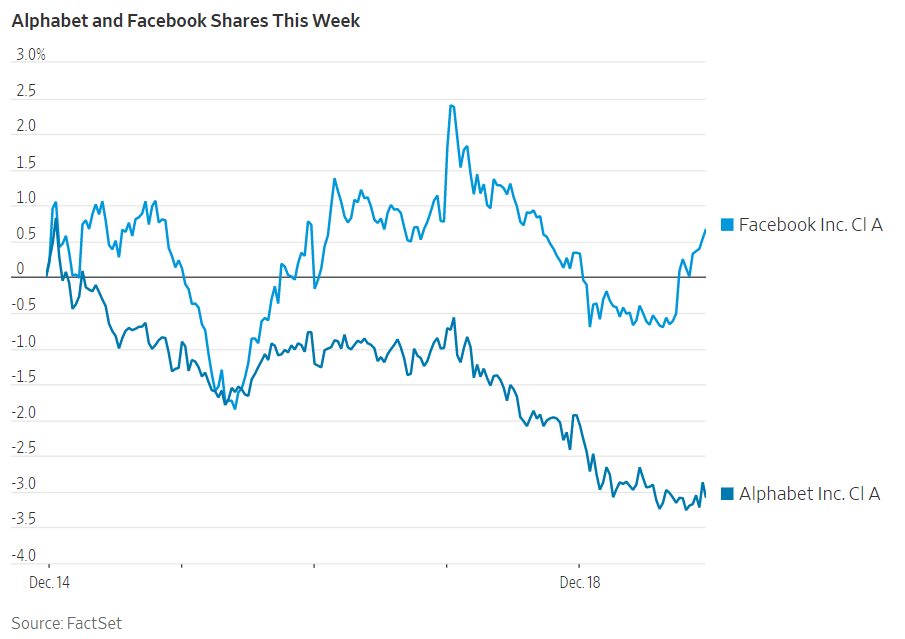

**BOEING**

- Boeing is taking a closer look at some of its 787s. The plane maker has expanded inspections of newly produced Dreamliners after finding more manufacturing defects., holding up deliveries. These delays threaten to add to Boeing’s financial strain as it struggles with fallout from the pandemic, which has sapped global demand for air travel and passenger jets. The wide-body Dreamliner passenger jets, which Boeing first delivered in 2011, have an excellent safety record, but the latest defects mark the fourth assembly-line lapse in recent months. Delivery data shows that November was the only month since 2013 without a Dreamliner delivery, other than May, when the pandemic forced Boeing to briefly close production facilities. Boeing shares fell 0.7% Monday.


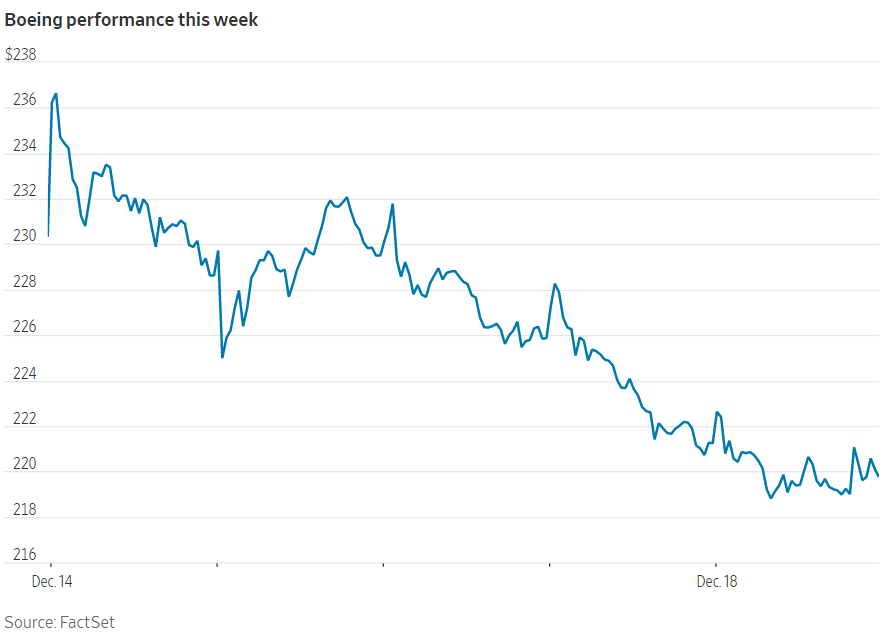

**ASTRAZENECA PLC.**

- AstraZeneca is branching out. The British drug giant agreed to buy Boston-based Alexion Pharmaceuticals Inc. for USD 39 billion in cash and stock, a move to bolster its footprint in the lucrative field of rare-disease drugs. The bulk of Alexion’s USD 6 billion in annual sales comes from Soliris, which treats a rare blood disorder. . At an average annual cost of about USD 600,000, it is among the most expensive drugs in the world. Still, Soliris’s patent protection is waning, and the drug faces potential competition that could undercut sales, so Alexion has been working to persuade doctors to switch their patients to a new drug called Ultomiris that is protected from U.S. competition until at least 2030. The company says the advantages of Ultomiris over Soliris include less frequent shots and a lower price. The average annual cost of Ultomiris is about USD 458,000. American depositary shares of AstraZeneca fell 7.8% Monday.

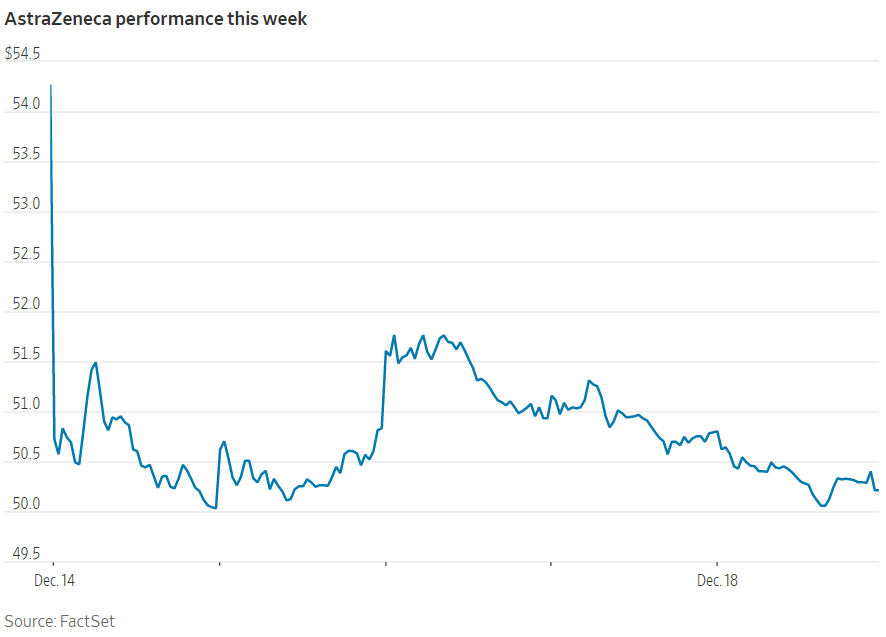

**MODERNA**

- U.S. health regulators late Friday permitted use of Moderna’s Covid-19 vaccine, the second shot to get the green light to help end the pandemic. The Food and Drug Administration’s authorization comes a week after the agency authorized the first shot in the U.S., from Pfizer Inc. and its partner BioNTech SE. Moderna, a ten-year-old biotech that has never had a product cleared by the FDA, expects to deliver a total of 20 million doses by the end of December. Moderna shares rose 5.1% Thursday when an advisory panel cleared the way for Friday night’s authorization.


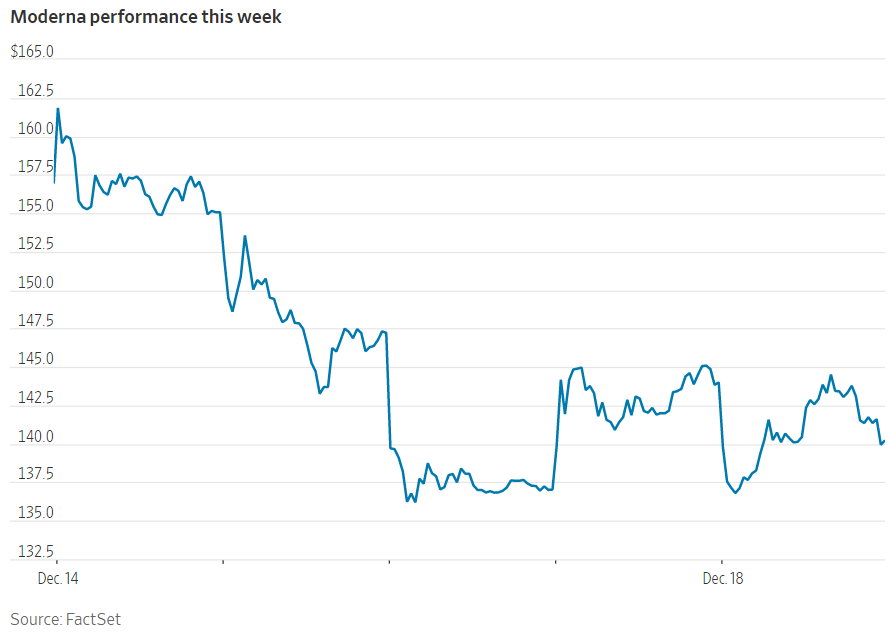

[Back to Table of Contents](#content)

<a id ="fi"></a>
## FIXED INCOME

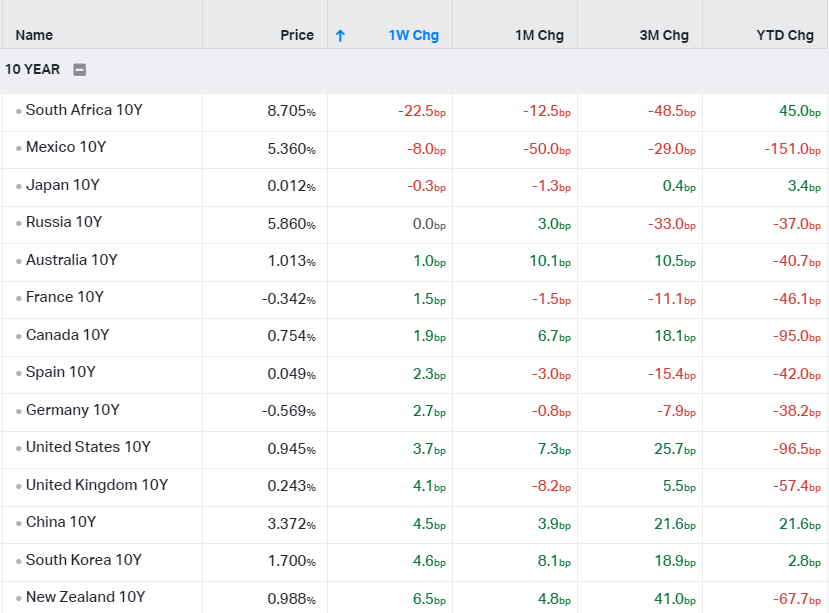

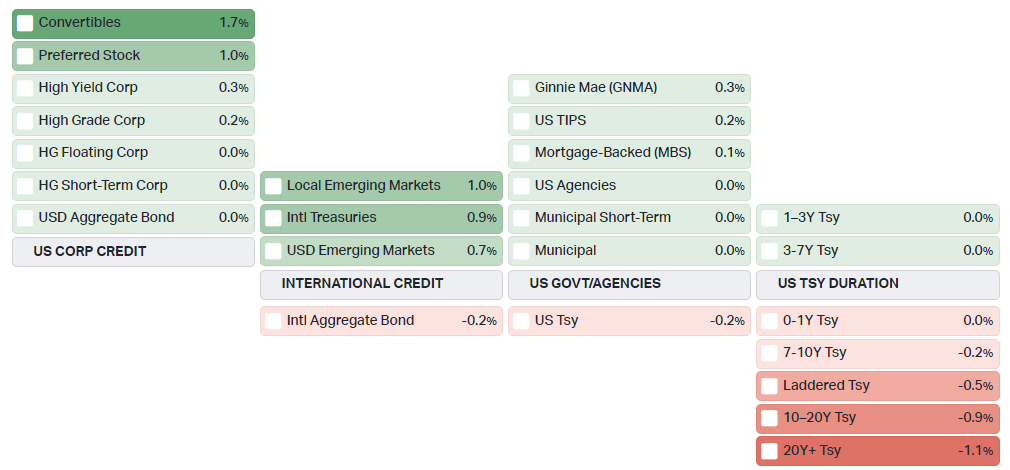

**HIGHLIGHTS**


- The week under review saw UST movements reacting to the frequent updates on the proposed stimulus bill and also the mixed bag of economic data. The continued expansion in November’s industrial production was neutralized by weaker-than expected initial jobless claims for week ended 12th Dec. Overall benchmark yields closed between -2 to +6bps bps across the curve. The curve ended steeper again with the 2Y benchmark; reflective of interest rate predictions edging 2bps lower at 0.12% whilst the much-watched 10Y (which traded within a tighter 0.89%-0.93% range); rising 3bps at 0.93%. the Fed’s language from the FOMC meeting reinforced that its asset-purchase could continue for longer than previously believed and is committed to helping boost the economy by keeping borrowing costs low and maintaining short-term interest rates near zero.



**DM CENTRAL BANKS ACTION**

- The **Fed** will continue to increase its holdings of Treasury securities by at least USD 80 billion per month and of agency mortgage-backed securities by at least USD 40 billion per month until substantial further progress has been made toward employment and inflation. Regarding new economic projections, the Fed sees the US economy shrinking less in 2020 (-2.4% vs -3.7% seen in September) and expand at a faster pace in both 2021 (4.2% vs 4%) and 2022 (3.2% vs 3%). PCE inflation is seen unchanged at 1.2% in 2020 and slightly higher next year (1.8% vs 1.7%) and in 2022 (1.9% vs 1.8%). Unemployment is also seen lower at 6.7% in 2020 (vs 7.6%), 5% in 2021 (vs 5.5%) and 4.2% in 2022 (vs 4.6%). The fed funds rate is likely to stay at current record low levels at least through 2023.


- The **Bank of England** voted unanimously to maintain Bank Rate at a record low of 0.1% and the size of its bond-buying program at £875 billion during its December meeting, as policymakers took a wait-and-see approach amid uncertainty surrounding a post-Brexit trade deal and concerns over the coronavirus situation. Still, the central bank noted that the successful trialing of some Covid vaccines and initial plans to roll them out widely over the first half of next year will likely reduce the downside risks to the economic outlook. Looking ahead, officials pledged to take whatever additional action is necessary to achieve the 2% inflation target, in a way that helps to sustain growth and employment. CPI inflation is expected to rise quite sharply towards the target in the spring, as the VAT cut comes to an end and the large fall in energy prices earlier this year drops out of the annual comparison.


- The **Bank of Japan** left its key short-term interest rate unchanged at -0.1% and maintained the target for the 10-year Japanese government bond yield at around 0% during its December meeting by an 8-1 vote. The BoJ also mentioned that it will not change its yield curve control or quantitative easing framework. However, the central bank said will extend the duration of additional purchases of CP and corporate bonds by six months until the end of September 2021, with an upper limit on the amount outstanding of about JPY 20 trillion. In addition, the bank also extended by six months to September 2021 its fund-aid scheme for companies hit by the COVID-19 crisis. In an unexpected move, policymakers added they will begin looking into better ways to achieve its inflation target of 2% and release its finding in March.


**EM CENTRAL BANKS ACTION**


- **Mexico**'s central bank kept its benchmark interest rate unchanged at 4.25% on 17 December 2020, matching market expectations. The bank held borrowing costs steady for the second straight meeting after nearly 1-1/2 years of cuts, mentioning that this pause to easing cycle provides the necessary room to confirm that the trajectory of inflation converges to the target. Policymakers noted that the annual inflation dropped to 3.33% in November from 4.09% in October. The Committee underscored that economic activity started to recover in the third quarter of the year, although it remains below the levels prior to the pandemic in an environment of uncertainty and downward risks. Policymakers added will take the necessary actions in order for the policy rate to be consistent with the orderly and sustained convergence of headline inflation to the target.


- The **Bank of Russia** held its benchmark interest rate at 4.25% during its December meeting, saying inflation is developing above its forecast and is expected to lie within the range of 4.6-4.9% at the end of 2020. At the same time, policymakers voiced concerns about the worsening epidemic crisis in Russia and worldwide and its impact on economic activity; while the situation in financial and commodity markets has improved, amid expectations of faster global economic recovery on the back of vaccine development progress. Looking ahead, policymakers see annual inflation reaching 3.5-4.0% in 2021 and stabilizing close to 4% later on. The central bank also said it will assess the economic and price movement developments and the existence of a potential for additional key rate reduction.


- The **Central Bank of Colombia** left its key interest rate steady at a record low of 1.75% on December 18th of 2020, as widely expected. The decision was backed by five of the seven board members. Policymakers noted that the annual inflation fell to 1.49% in November, the lowest since November of 1955. The Committee forecasts inflation to remain at low levels during the first quarter of 2021 and then to accelerate during the rest of the year. Also, the central bank projects the annual inflation rate at 2.7% by the end of 2021 and at 3% by the end of 2022.

- Spreads across the board are tight: investment grade spreads have retraced 97% from their wides to 104 basis points (bps). High yield spreads at the index level (423bps) look relatively attractive, but further spread tightening is likely to be driven by riskier, Covid-stricken names, as higher quality names with stronger fundamental outlooks are closer to pre-crisis tights. Select unhedged emerging market local bonds offer attractive all-in yields: the average yield among four of the top picks—Indonesia, Russia, Mexico and South Africa—is 6.7%.


- Wherever you look, investors seem to be long risk. Investors are positioned long emerging market currencies, while around a third of the USD 17.6 billion that has flowed into fixed income markets in December so far has gone into emerging market debt funds. Although the consensus trade is something to be conscious of, the current strong momentum should continue in the absence of a significant shock to the vaccine and recovery narrative, especially given the amount of cash on the sidelines (money market fund assets under management are still up over USD 1.4 trillion year to date). 

[Back to Table of Contents](#content)

<a id ="cur"></a>
## Currencies (FX)

In [5]:
ccy = pd.read_excel('World_Indices_List.xlsx', sheet_name='Currencies', header=0)
ccy_data = yf.download(list(ccy['Ticker']), start='2020-01-01', progress=False)
ccy_data = ccy_data['Close'].ffill()

In [6]:
def ccy_perf():
    oned_lcl = pd.concat([(ccy_data.iloc[-1,:]/ccy_data.iloc[-6,:]-1),
                            (ccy_data.iloc[-1,:]/ccy_data.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Ticker'
    oned_lcl = ccy.merge(oned_lcl, on='Ticker')
    oned_lcl= oned_lcl.set_index('Ticker')
    return oned_lcl

ccy = ccy_perf()

In [7]:
def ccy_hmap(sortby):   
    hmap = ccy.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Chg WTD (%)': "{:.3%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(ccy.drop(['Name'], axis=1).columns))
    return hmap

style = {'description_width': 'initial'}
interact(ccy_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

In [8]:
def perf_ccy(timeframe):
    weekly_usd = ccy
    if timeframe=='Weekly':
        weekly_usd1 = ccy.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).sort_values(by='Chg WTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd['Chg WTD (%)'].values, text=weekly_usd1['Name'], color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = ccy.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).sort_values(by='Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd['Chg YTD (%)'].values, text=weekly_usd1['Name'])

    fig.update_layout(title = 'World Currencies ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Ticker: %{x} <br>Name: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_ccy,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS:**



- **USD:** DXY failed to hold up, even breaking the 90.0 key threshold, and fell more than 1.0% WoW to close at 89.82. The dollar continues to drift lower, partly encouraged by the Federal Reserve’s recent re-iteration of its plans to keep the policy rate on the floor until 2024. Perhaps [forward guidance is working after all](https://think.ing.com/articles/listen-forward-guidance-or-forward-garbage/). Approval of both the FY21 budget and a USD 750-900bn stimulus package over coming days could be greeted warmly by investors and maintain the dollar’s soft tone. USD bears will likely persist going into next week as markets scrutinize the last batch of key US data including final reading of 3Q GDP, personal outlay reports, durable goods orders and home sales before the year concludes.


- **EUR**: EUR/USD (+0.98%) continued pushing higher despite being at stretched levels, spurred by renewed optimism surrounding Brexit talks, as well as USD weakness, in addition to spillover effects from ECB’s QE extension announced late last week. The EUR rallied past 1.22 to reach a week-high of 1.2273. The move above 1.20 has not elicited much, if any, response from the European Central Bank. If topics such as the US stimulus/budget and Brexit can be resolved over coming days, we can expect this powerful dollar bear trend to continue carrying EUR/USD towards its next major target of 1.25. 



- **JPY**: JPY also saw reversed fortune as it strengthened 1.02% WoW to 103.32 amid USD weakness, far outweighing the spike in risk appetite. Technically, the break below 103.70 should strengthened JPY bulls, eyeing 102.40 followed by 101.00 next. The ever-steepening US Treasury curve may also be encouraging Japanese investors to raise their USD hedge ratios now that higher yields are available at the long end of the curve. After Friday’s Bank of Japan meeting, the Japanese calendar is now very light into year-end. The highlight will probably be the November retail sales and jobless data. As long as USD/Asia in general stays offered, authorities in Tokyo may be a little more comfortable with this gentle USD/JPY decline – though any approach to [100 will no doubt spark a pick-up in verbal intervention](https://www.bloombergquint.com/markets/wall-street-s-call-for-yen-at-100-is-catching-on-at-japan-banks).


- **AUD**:  The trajectory in AUD/USD closely tracked movement in other majors, breaking out from a range trading mode in the region of 0.7500-0.7570 the past week and rallied past 0.7600 this week. The pair gained 1.21% WOW to 0.7622, buoyed by USD weakness, rising iron ore prices, and better risk sentiments this week. Iron ore will remain another interesting factor to keep an eye on as the recent surge in prices (its sixth consecutive week of gains) exceeded the broader rally in metals. An improving supply picture (especially in Brazil) and a cooling off in Chinese demand [could trigger a significant correction](https://think.ing.com/articles/cmd-iron-ore-to-sustain-gains/). With the US dollar struggling to rebound and risk assets staying supported, this appears one of the two key risks to the AUD looking ahead. The second one is related to any further escalation in the Australia-China trade tensions, to which AUD has retained a very complacent stance: the lack of AUD reaction to [China’s ban on Australian coal](https://www.bloomberg.com/news/articles/2020-12-14/australia-deeply-troubled-by-reports-of-china-coal-import-ban) this week was a case in point.



- **NZD:** The New Zealand dollar has had a good week, rising 0.76% WoW, as upbeat global sentiment paired with a rebound in GDP that exceeded expectations. Also, NZD was helped by Finance Minister Grant Robertson’s comment on the currency that pointed to a relaxed stance on the recent appreciation. NZD is entering the holiday season more comfortably than AUD if we consider the lack of clear idiosyncratic catalysts for a correction, but it remains the only overbought commodity currency in the G10 (net longs vs USD were at 17% of open interest as of last week, according to CFTC data), so some position-squaring may get in the way of further gains.


- **GBP**: Pound was the top performer in G10 FX this week, surging almost 2%. The UK-EU trade deal remains the base case, despite the very latest newsflow (which translated into a modestly weaker pound yesterday). Plenty of progress has been made already (with the issue of state aid seemingly resolved) and expectations are for the (rather political) issue of fisheries to be resolved as well. While the timing remains uncertain, the eventual agreement should provide a modest boost to GBP. EUR/GBP is to dip below 0.89 and with EUR/USD grinding higher, this suggests GBP/USD pushing to the 1.38 level next week.


- **CAD**: The Canadian dollar's rally lost some steam (+0.06% WoW) after a very strong first half of the month, but USD/CAD looks set to remain in a depreciating trend on the back of USD weakness and still solid CAD fundamentals. Data releases this week (CPI, housing starts) are suggesting that the Canadian economy maintained a good pace of recovery in November, while oil prices continue to be boosted by hopes of a rebound in demand as vaccines are rolled out.


- **EMFX**: In EMFX, Turkish Lira (+2.45%), South African Rand (+2.24%) & Chilean Peso (+1.79%) were the top performers, while the Mexican Peso (+0.8%) and Thai Baht (+0.8%) also showed strong momentum considering their recent outperformance in the EMFX space. The Brazilian Real and the Korean Won were the only ones down for the week by 0.65% and 0.53% respectively. Meanwhile, The U.S. Treasury Department designated Switzerland and Vietnam as currency manipulators for the first time, while keeping China on a watch list, in the Trump administration’s final foreign-exchange policy report.

[Back to Table of Contents](#content)

<a id ="comd"></a>
## Commodities

In [11]:
comds= pd.read_excel('World_Indices_List.xlsx', sheet_name='Commodities', header=0)

In [13]:
tdy = str(date.today().day)+'/'+str(date.today().month)+'/'+str(date.today().year)

#def comd_data(commodity):
#    df = investpy.get_commodity_historical_data(commodity=commodity, from_date='01/01/2020', to_date=tdy)['Close']
#    df = pd.DataFrame(df)
#    df.columns = [commodity]
#    return df

#df = pd.DataFrame(index=pd.bdate_range(start='2020-01-01', end=date.today()))
#df.index.name='Date'

#for i in range(len(comds)):
#    df = df.join(comd_data(comds['Commodities'][i]), on='Date')

#df = df.ffill().dropna()
#df.to_excel('comd1.xlsx')

In [14]:
df = pd.read_excel('rawdata.xlsx', sheet_name='Commodities', header=0, index_col=0)

In [15]:
def comd_perf():
    oned_lcl = pd.concat([df.iloc[-1,:], (df.iloc[-1,:]/df.iloc[-6,:]-1),
                            (df.iloc[-1,:]/df.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Price (EOD)', 'Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Commodities'
    return oned_lcl

comd = comd_perf()
comd.drop('Lumber', axis=0, inplace=True)

In [16]:
def comd_hmap(sortby):   
    hmap = comd.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}", 'Chg WTD (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)'], axis=1).columns))
    return hmap
    
interact(comd_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

In [17]:
def perf_comd(timeframe):
    weekly_usd = comd.copy()
    if timeframe=='Weekly':
        weekly_usd1 = comd.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).dropna().sort_values(by='Chg WTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd['Chg WTD (%)'].values,text=weekly_usd1.index, color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = comd.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).sort_values(by='Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd['Chg YTD (%)'].values, text=weekly_usd1.index, color_continuous_scale='rdylgn')

    fig.update_layout(title = 'Commodities ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Return (%)',
                       yaxis_title='Commodities', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Commodity: %{x} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_comd,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS**

> The combination of a global market flushed with cash, driving wild speculation across markets, and the potential for another super cycle in commodities led by China and its unstoppable appetite for raw materials, have seen the Bloomberg Commodity Index rise by close to 9% this quarter. Still on track for an annual loss, mostly due to heavy losses in energy during the early stages of the pandemic, the prospect for 2021 is looking increasingly bright.


> The combination of the green transformation driving demand for key industrial metals, including silver, a weaker dollar, increased demand for inflation hedges, a pickup in fuel demand as global mobility recovers and not least rising demand outside China as governments go on a spending spree to support jobs. Adding to these the risk of elevated food prices as the weather becomes more volatile.




- **WTI crude** oil prices climbed 1.1% to USD 48.9 per USD and hit a 9-month high on Friday, as stimulus and vaccine hopes lifted sentiment. On Friday, Pfizer applied for approval in Japan for its vaccine, which is being used in the UK and the US. Meanwhile, Vice President Mike Pence said the US approval for Moderna’s shot could come later on Friday. Oil gained support this week from weekly supply data in the US showing crude inventories fell by 3.1 million barrels, beating expectations. In their latest oil market reports for December, OPEC, IEA and EIA all warned that the rebalancing of the global oil market may take longer than previously expected. Following a demand loss of 9.2 million barrels/day in 2020, the three forecasters now see a 5.8 million barrel/day recovery in 2021 with the IEA seeing the oil glut staying until end-2021.


- Having rallied non-stop since the early November vaccine announcements, Brent crude oil has now recovered 61.8% of the January to April collapse. Given the near-term outlook for supply and demand, the rally is likely to pause with USD 50/b being the level to gravitate around until an actual improvement in demand becomes more visible.

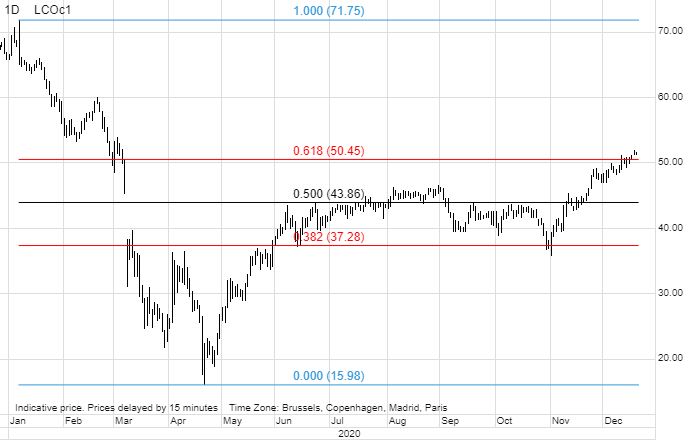

- **COPPER**: The ongoing ‘everything’ rally this past week was particularly noticeable in metals. Leading from the front we find industrial metals where HG copper (+3% WoW) topped USD 3.6/lb and LME copper USD 8000/t for the first time in seven years. That strength has been filtering through to semi-precious metals, with silver trading up by more than 8% on the week after breaking key technical levels, both against the dollar and against gold. 


- One of the main obstacles for a commodity rally during the past decade has been the ample availability of raw materials. Oversupply during the past decade and especially during the past six years kept the commodity sector as a whole in a state of contango where the spot price, due to ample availability, trades cheaper than deferred prices. The impact on passive long investments can be seen in the below chart.


- Since 2014, a portfolio of 24 major commodities carried a negative roll yield which at times was as high as five percent on an annual basis. From an investment perspective, this headwind combined with a generally strong dollar and low inflation reduced the attraction of the sector. In recent months, however, the roll yield has turned positive with the change so far being led by the agriculture sector where key crops have rallied strongly in response to lower production and rising demand.

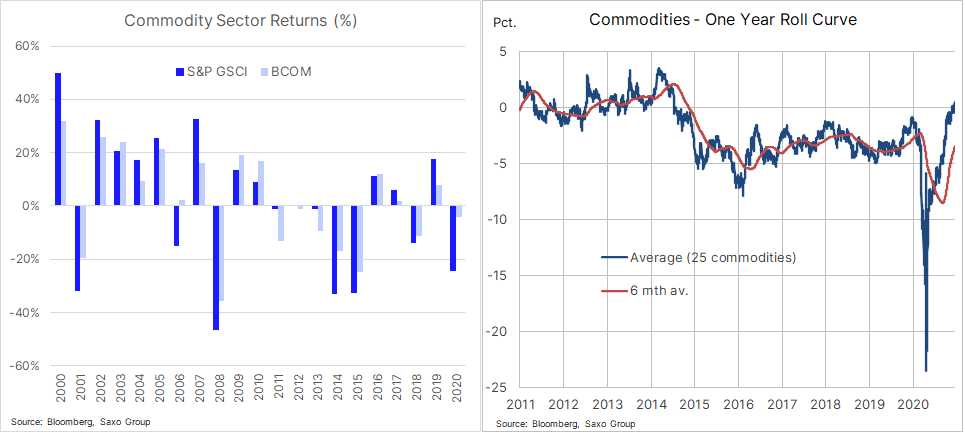

-  **Gold** and not least **Silver**, the star performer this past week, enjoyed the continued surge in risk sentiment driven by a weaker dollar, U.S. lawmakers making progress towards a stimulus deal and the FOMC strengthened its commitment to supporting the recovery. Silver, up 8% on the week, was helped by a continued rally across the industrial metal sector. Once it broke the downtrend from the August high it raced higher to the next level of resistance at USD 26/b. Gold meanwhile is on track for its biggest annual gain in a decade has paused with USD 1900/oz the next major level to break.

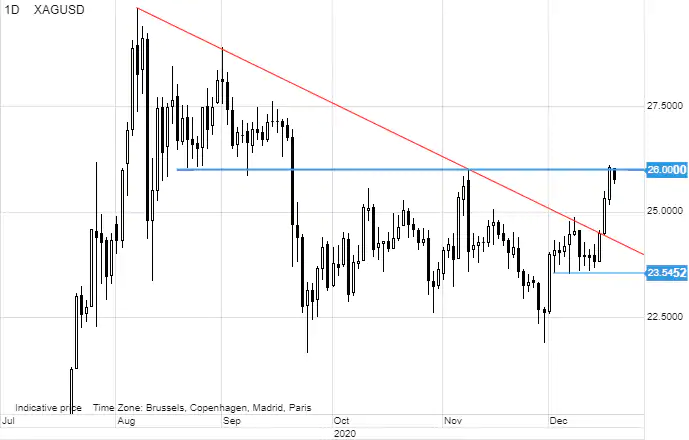

[Back to Table of Contents](#content)

<a id ="charts"></a>
### CHARTS OF THE WEEK

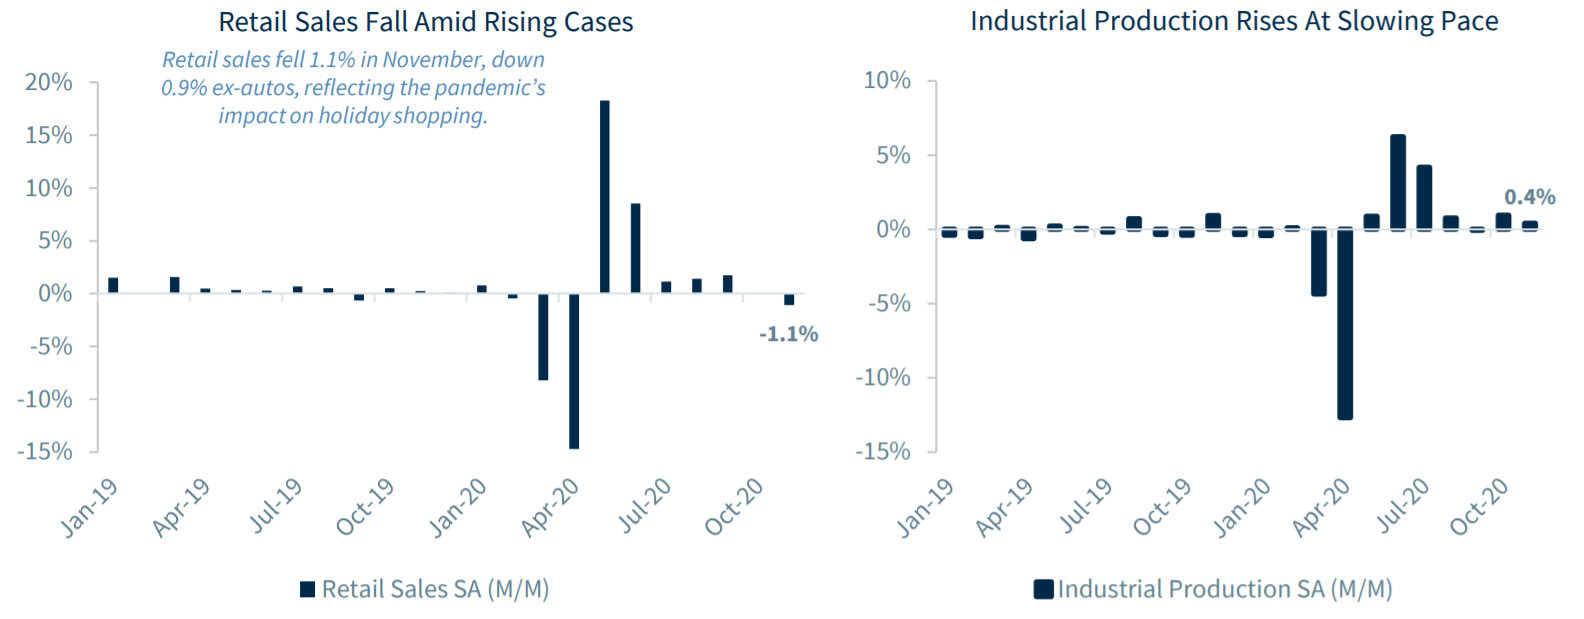

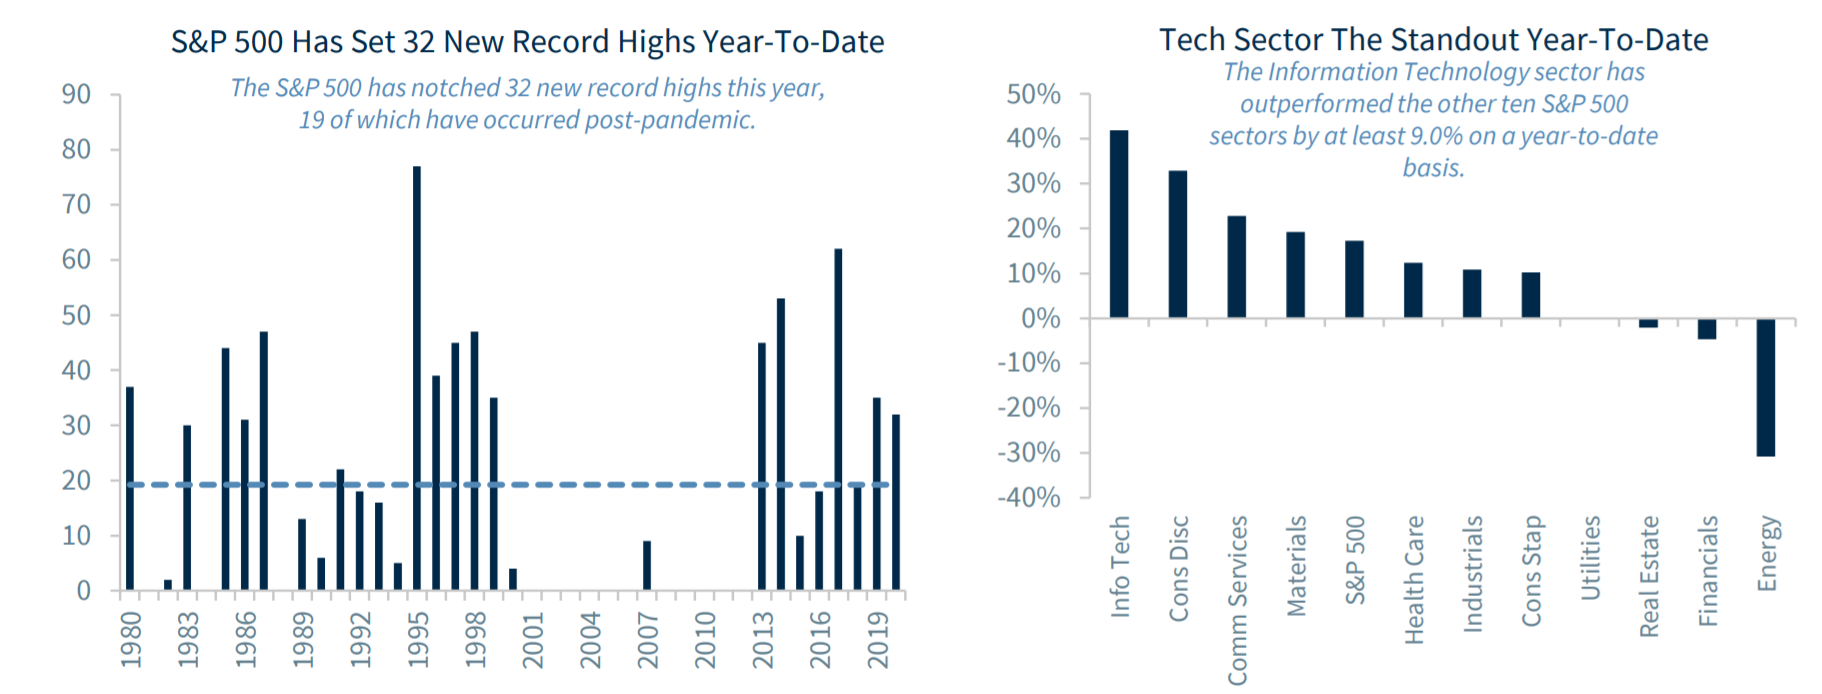

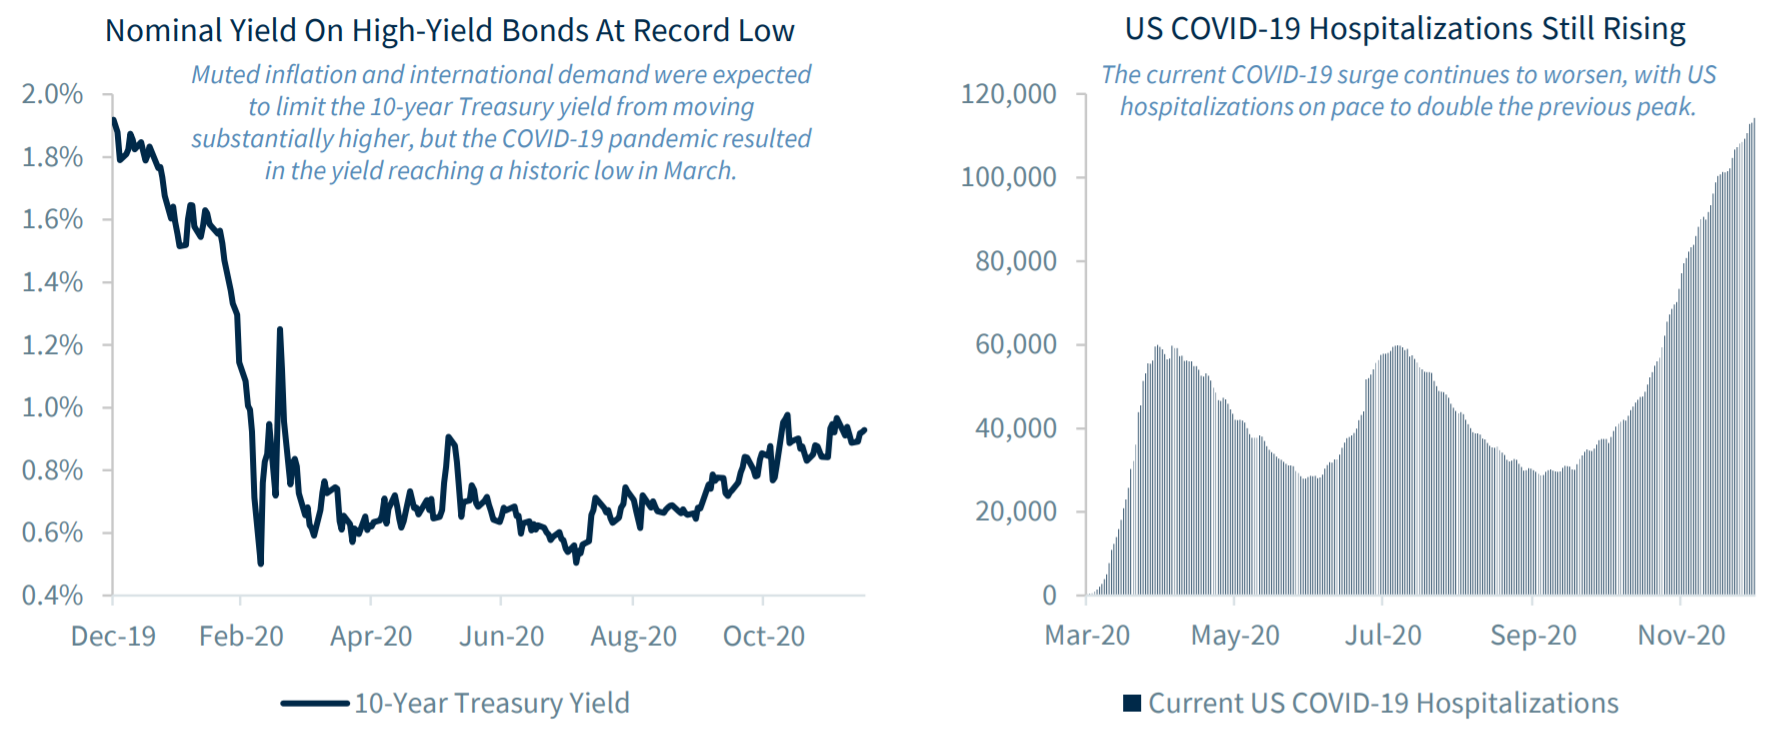

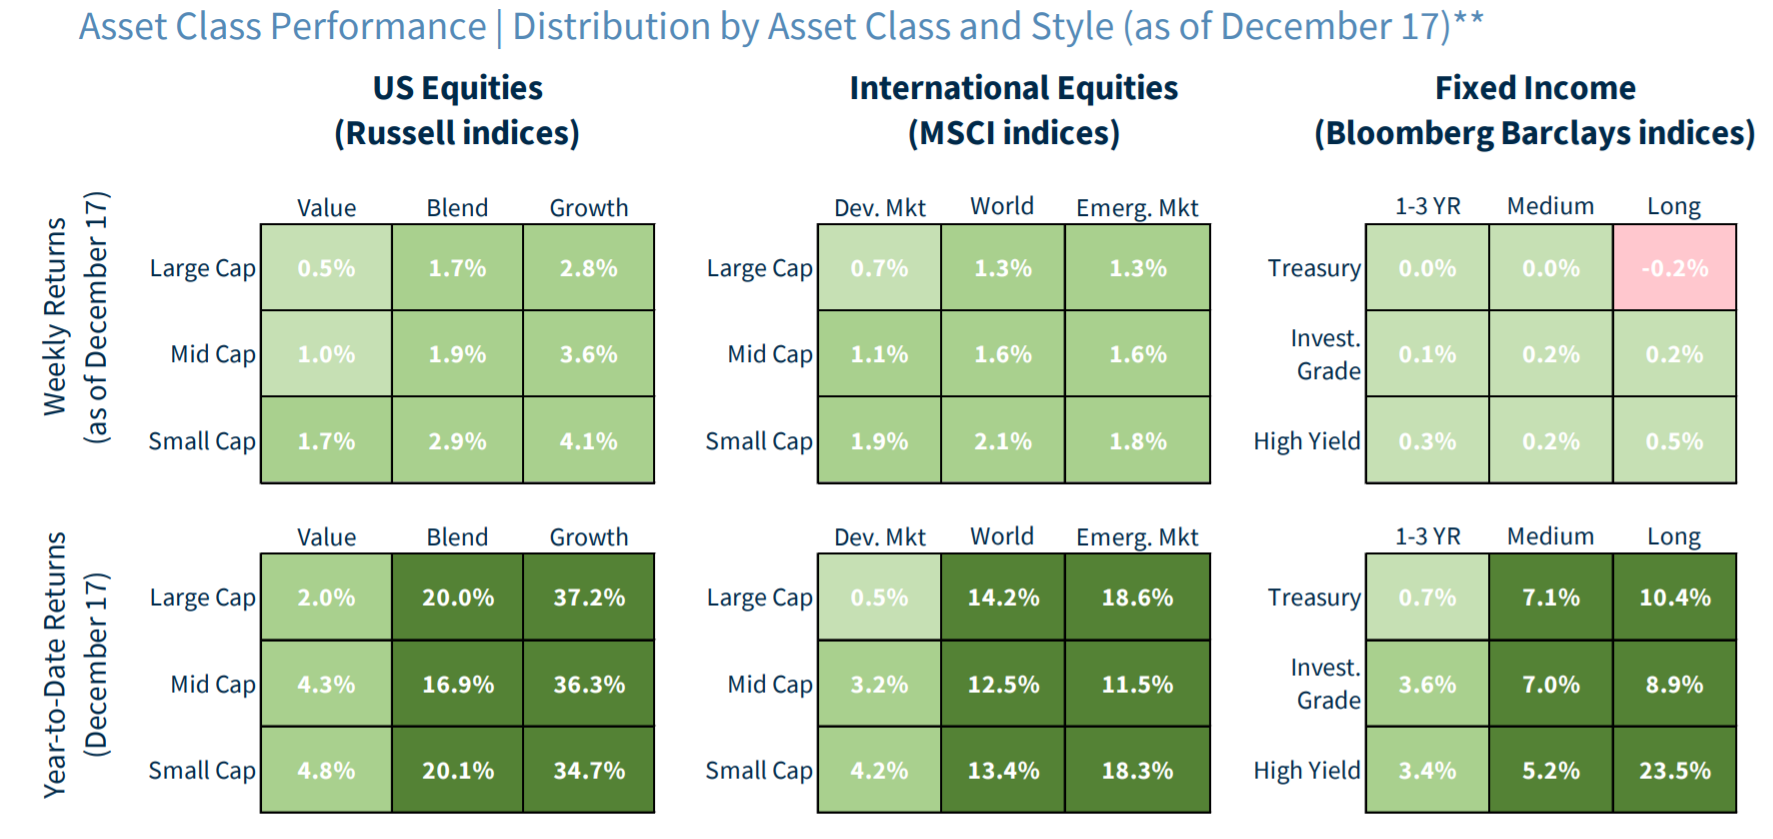

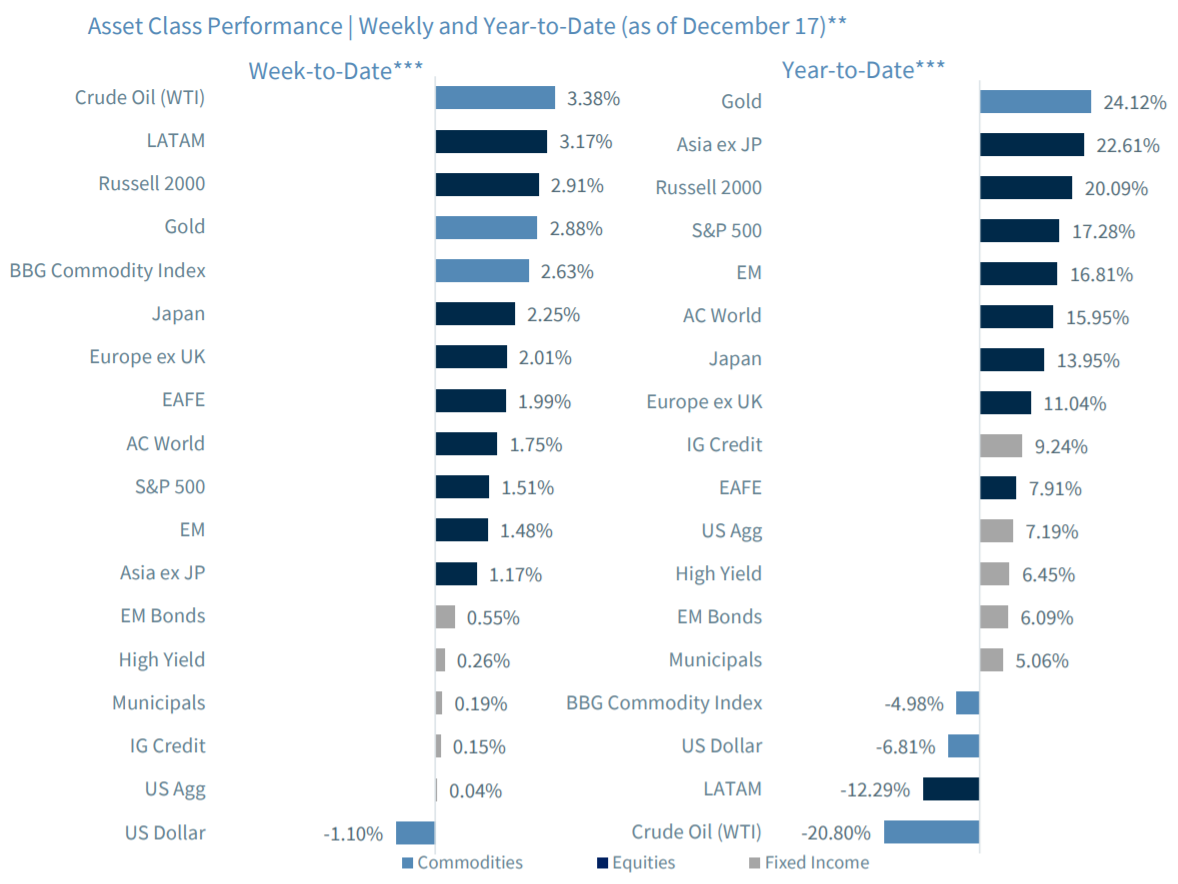

[Back to Table of Contents](#content)

<a id ="eco"></a>

## Key Economic Events Next Week 

In [18]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/economic-calendar/" rel="noopener" target="_blank"><span class="blue-text">Economic Calendar</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-events.js" async>
  {
  "colorTheme": "light",
  "isTransparent": false,
  "width": "700",
  "height": "600",
  "locale": "en",
  "importanceFilter": "0,1"
}
  </script>
</div>
<!-- TradingView Widget END --> """)

[Back to Table of Contents](#content)